The main purpose of this document is to introduce the 5 methods of anomaly detection covered in the lecture.
1. Density-based technique - Local outlier factor (LOF)
2. Model-based technique - Univariate Gaussian model
3. Distance-based technique
4. Cluster-based technique 
5. Isolation-based technique - Isolation Forest

We will utilize a dummy dataset comprising Gaussian inliers exhibiting varying density and uniformly distributed outliers for this document.


# 1. Data preparation

We first import the packages that will be used in this document.

1. [Pandas](https://pandas.pydata.org/): Pandas is an open-source Python library widely used for data manipulation, analysis, and cleaning tasks. The central data structure in Pandas is the [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) which provides methods to facilitate the preliminary examination of essential properties, statistical summaries, and a select number of rows for a cursory exploration of the data.

2. [Numpy](https://numpy.org/): Numpy is a powerful Python library for numerical and array-based computing. It provides support for large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to operate on these arrays efficiently. 

3. [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html): matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

4. [sklearn.neighbors.LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor): LocalOutlierFactor is an implementation of the local outlier factor(LOF) algorithm for anomaly detection provided by scikit-learn.

5. [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html): Stats is a submodule of the SciPy library, providing a wide range of statistical functions and probability distributions for various statistical analysis tasks. 

6. [sklearn.neighbors.NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html): NearestNeighbors is unsupervised learner for implementing neighbor searches, provided by scikit-learn.

7. [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html): Distance is a submodule of the SciPy library that provides a collection of distance metrics.

8. [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): KMeans is a class provided by scikit-learn, used to create a $k$-means clustering.

9. [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html): DBSCAN is a class provided by scikit-learn, performing DBSCAN clustering from vector array or distance matrix.

10. [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html): IsolationForest is an implementation of the Isolation Forest algorithm provided by scikit-learn.

11. [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html): DecisionBoundaryDisplay is a decision boundary visualization, provided by scikit-learn.

**Note: [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) is available starting from version 1.1. Please ensure that your scikit-learn version is 1.1 or later to use this feature.**

These packages will be utilized in following tasks for data preparation, anomaly detection and hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.stats as stats
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

First, we load the data.

In [2]:
df = pd.read_csv('dummy_data.csv')

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

We plot the dataset with the true class of outliers and inliers by [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) to observe the distribution.

[plt.figure()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure) is used to create a new figure and we set the figure size by the parameter `figsize`.

[plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) is a scatter plot of y vs. x with varying marker size and/or color, parameter `c` to define the marker colors and `s` for marker size.

[PathCollection.legend_elements](https://matplotlib.org/stable/api/collections_api.html#matplotlib.collections.PathCollection.legend_elements) create legend handles and labels for a PathCollection, here is for the scatter.

[plt.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) places a legend on the Axes.

The title is set by [plt.title()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title).

To render all active figures, [plt.show()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show) is called.


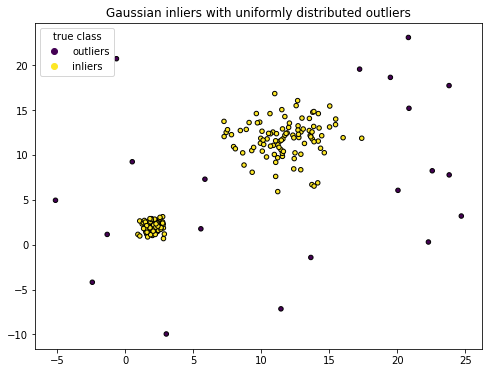

In [4]:
plt.figure(figsize = (8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with uniformly distributed outliers")
plt.show()

# 2. Anomaly detection 

## 2.1 Density-based technique - Local outlier factor (LOF)

For conducting a local outlier factor, we use [LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor) provided by scikit-learn.

$k$(n_neighbors) and contamination are two important hyperparameters for LOF, which are controlled by the parameters `n_neighbors` and `contamination` in [LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor).

The parameter `n_neighbors` represents the number of neighbors to use by default for kneighbors queries. It is set to `20` by default.

The parameter `contamination` means the amount of contamination of the data set, i.e. the proportion of outliers in the data set. When fitting this is used to define the threshold on the scores of the samples. It should be 'auto' or a float. It is set to `auto` by default. When it is a float, it should be in the range (0, 0.5].

We use [fit_predict()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor.fit_predict) to fit the model to the training set X and predict labels. 

[plt.figure()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure) is used to create a new figure and we set the figure size by the parameter `figsize`.

In [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), cmap is used for a scalar  to be mapped to colors.

The names for x-axis and y-axis are set by [plt.xlabel()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel), [plt.ylabel()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel), respectively.

To render all active figures, [plt.show()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show) is called.

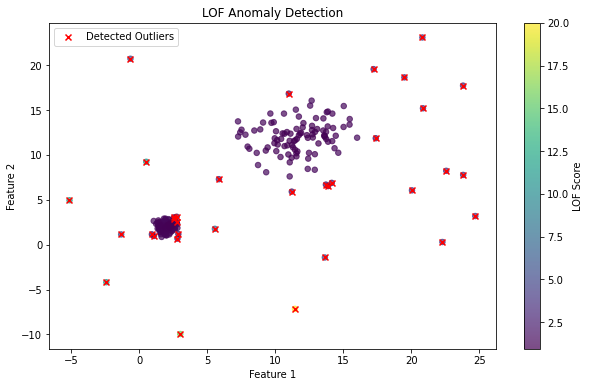

In [5]:
LOF = LocalOutlierFactor()
y_pred_LOF = LOF.fit_predict(X)
X_scores = -LOF.negative_outlier_factor_ # High LOF: Outliers, Low LOF: Inliers.
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=X_scores, s=30, cmap='viridis', alpha=0.7)
plt.colorbar(label='LOF Score')
plt.title(f'LOF Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Mark the detected outliers in red
plt.scatter(X[y_pred_LOF == -1, 0], X[y_pred_LOF == -1, 1], c='red', marker='x', label='Detected Outliers')

plt.legend()
plt.show()

With the default setting, it turns out a poor result.

### 2.1.1 Tuning hyperparameters

Employ visual inspection for evaluation in for loops with different contamination and $k$(n_neighbors).

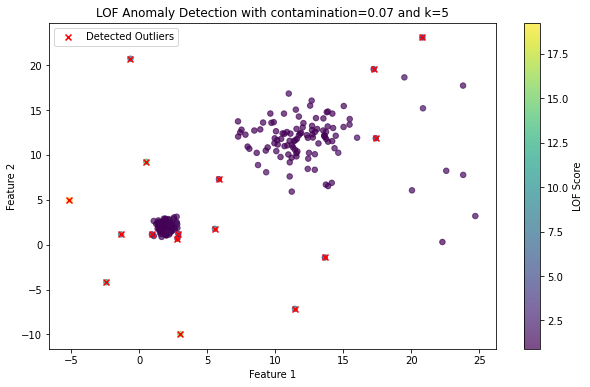

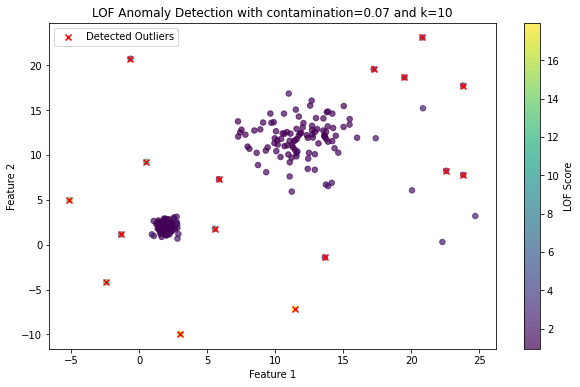

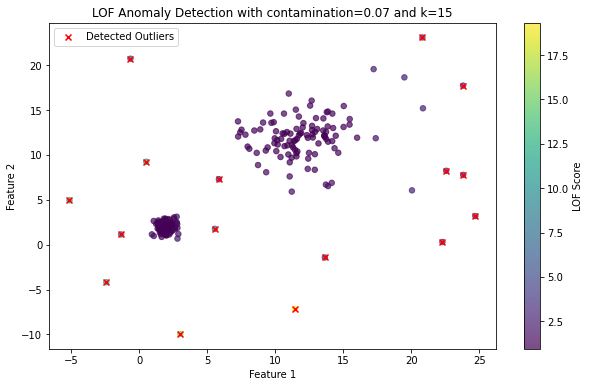

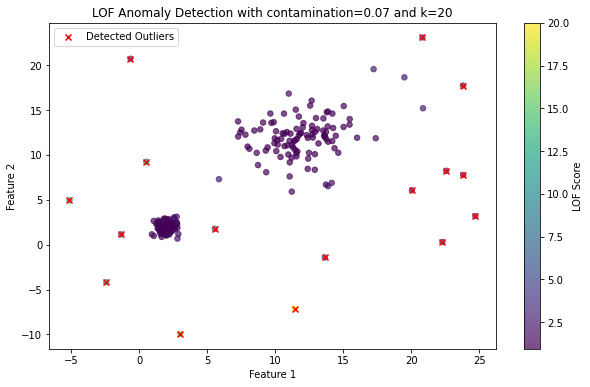

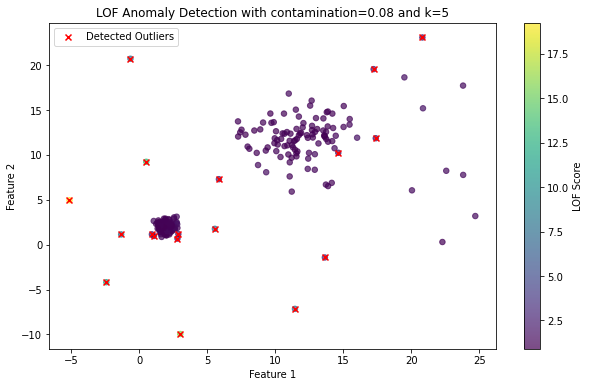

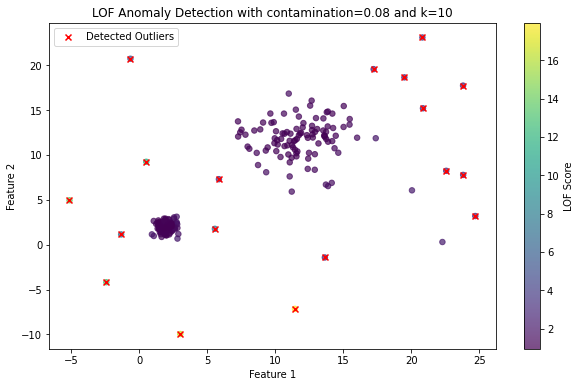

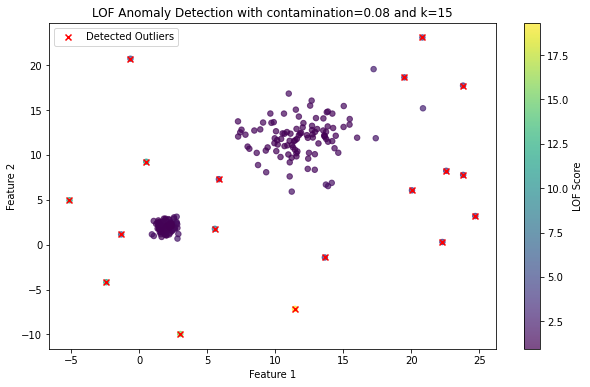

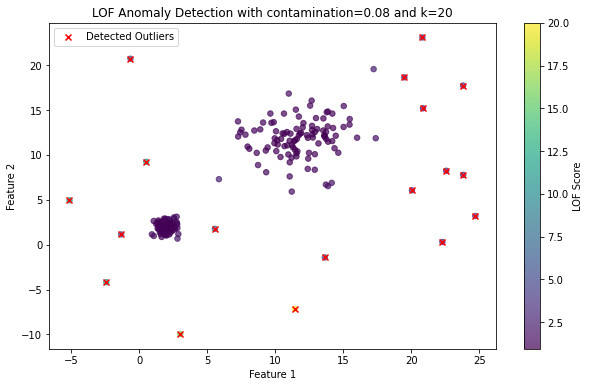

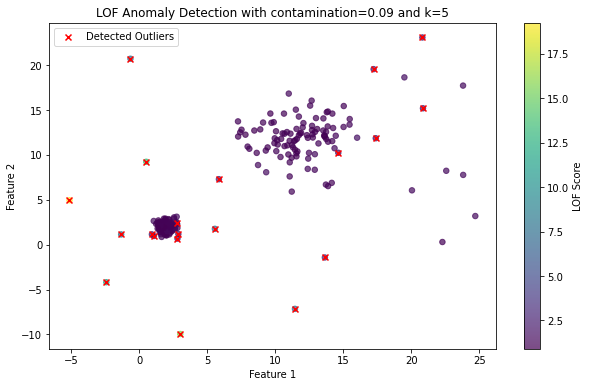

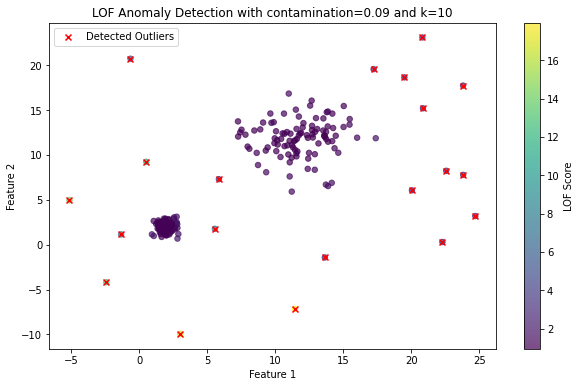

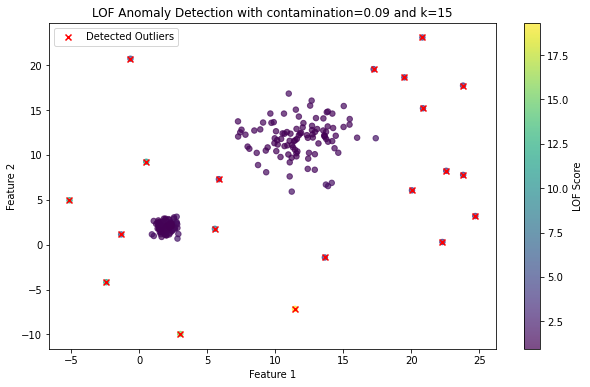

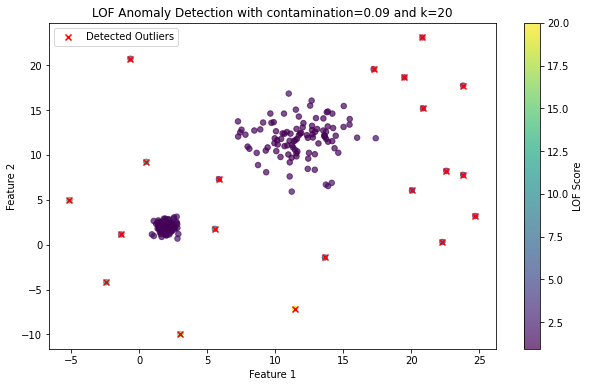

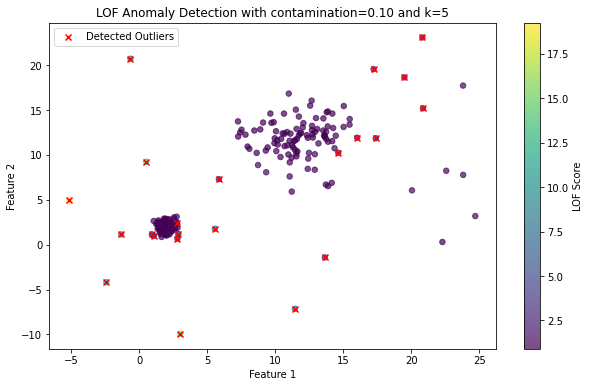

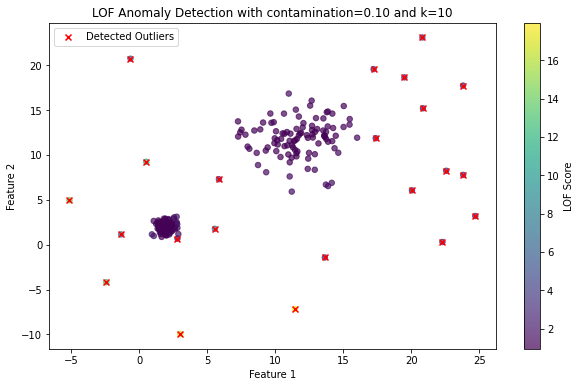

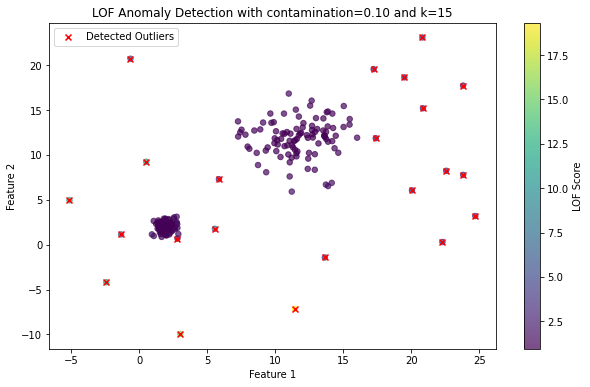

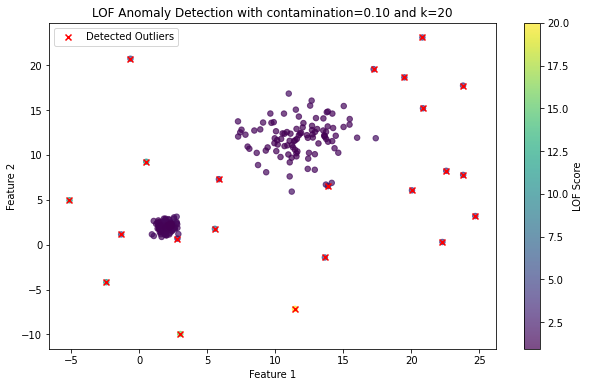

In [6]:
for contamination in np.arange(0.07, 0.11, 0.01):
    for n_neighbors in np.arange(5, 25, 5):
        LOF = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        y_pred_LOF = LOF.fit_predict(X)
        X_scores = -LOF.negative_outlier_factor_ # High LOF: Outliers, Low LOF: Inliers.
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=X_scores, s=30, cmap='viridis', alpha=0.7)
        plt.colorbar(label='LOF Score')
        plt.title(f'LOF Anomaly Detection with contamination={contamination:.2f} and k={n_neighbors}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Mark the detected outliers in red
        plt.scatter(X[y_pred_LOF == -1, 0], X[y_pred_LOF == -1, 1], c='red', marker='x', label='Detected Outliers')

        plt.legend()
        plt.show()

We can observe that when contamination = 0.09 and $k$ = 10, 15, 25, it gives better results.

## 2.2 Model-based technique - Univariate Gaussian

We apply the univariate Gaussian model on each column and determine any data point with any feature beyond the boundary as an outlier.

We use [np.zeros_like()](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) to create arrays of zeros with the same shape as the data we use with the data type of `float` for recording the likelihood for each row in the column and the boundary.

[np.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [np.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html) compute the arithmetic mean and the standard deviation respectively.

We use [stats.norm.pdf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), provided by [SciPy](https://docs.scipy.org/doc/scipy/reference/main_namespace.html) to calculate the likelihood based on the `loc` and `scale`, representing the mean and the standard deviation respectively in the case.

In [7]:
likelihoods = np.zeros_like(X, dtype=float)
filters = np.zeros_like(X, dtype=float)
for col in range(X.shape[1]):
    # Calculate the mean and standard deviation for the column
    mean = np.mean(X[:, col])
    std_dev = np.std(X[:, col])
    
    # Calculate the PDF (likelihood) for each row in the column
    likelihoods[:, col] = stats.norm.pdf(X[:, col], loc=mean, scale=std_dev)
    filters[:, col] = stats.norm.pdf((mean+(2*std_dev)), loc=mean, scale=std_dev)

We use [numpy.any()](https://numpy.org/doc/stable/reference/generated/numpy.any.html) to test whether any array element along a given axis evaluates to True. Here with `axis` set to `1`, it returns true for the rows with any column having a Ture.

In [8]:
condition_mask = np.any(likelihoods < filters, axis=1)

Determine the outliers with `condition_mask`.

In [9]:
outliers = X[condition_mask]

Visualize the data and anomalies with [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html). 

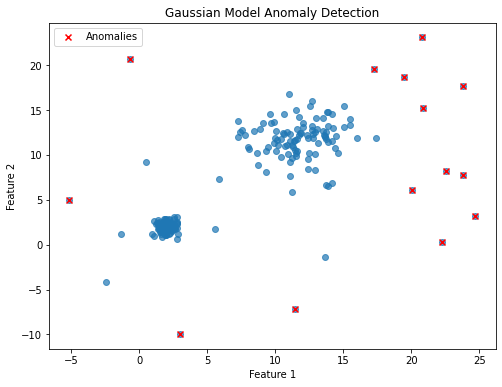

In [10]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.scatter(outliers[:, 0],outliers[:, 1], c='red', marker='x', label='Anomalies')
plt.legend()
plt.title('Gaussian Model Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Since the dummy data is generated by Gaussian distribution, Gaussian Model anomaly detection gives an acceptable result.

## 2.3 Distance-based technique

Utilizing the [NearestNeighbors()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) function for neighbor searches based on $k$, we proceed to fit the model with the dataset. 

We can then employ [kneighbors()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors) to obtain both the indices and distances to the neighbors of each data point.

In [11]:
n_neighbors = 5 # try other values for k by yourselves
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)

Calculate the anomaly score based on the distance between data points and their k-th nearest neighbor.

In [12]:
distance_score = distances[:,n_neighbors-1]

Visualize it with [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

Text(0, 0.5, 'Feature 2')

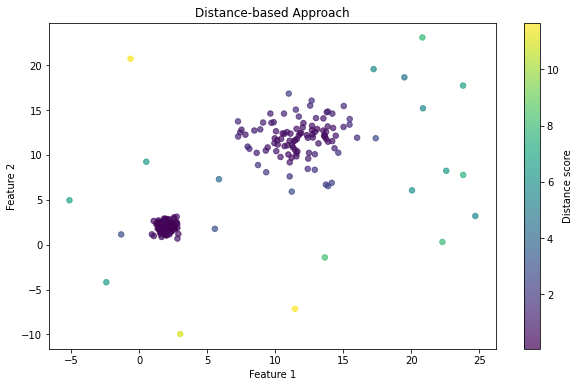

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=distance_score, s=30, cmap='viridis', alpha=0.7)
plt.colorbar(label='Distance score')
plt.title(f'Distance-based Approach')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

We can observe the outliers near the cluster with higher density will be difficult to detect.

## 2.4 Cluster-based technique 

### 2.4.1 $k$-Means

To apply a $k$-means clustering on the dataset, we use the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) provided by scikit-learn.

The parameter `n_clusters` represents the important hyperparameter of $k$-means, the number of clusters $k$. By default, it is set to `8`. Here obviously, it should be set to `2`.

We use [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) to compute clusters. 

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

c:\users\kaki_\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

Predict cluster labels for each data point with [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [15]:
cluster_labels_kmeans = kmeans.predict(X)

Get cluster centroids by `cluster_centers_`

In [16]:
centroids = kmeans.cluster_centers_

Calculate each data point's distance to its cluster center by selecting the minimum distance among the distances to the centroids, using [numpy.min()](https://numpy.org/doc/stable/reference/generated/numpy.min.html).

In [17]:
distances = np.min(kmeans.transform(X), axis=1)

Set a threshold for anomaly detection with [np.percentile()](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) with `90` to be the percentage for the percentiles to compute. You may try other values for the percentage on your own.

In [18]:
threshold = np.percentile(distances, 90)

Detect anomalies based on the threshold.

In [19]:
anomalies = distances > threshold

Visualize the data, anomalies and the centroids with [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

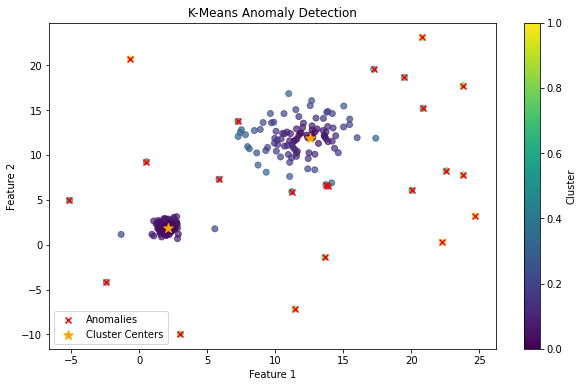

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=distances, cmap='viridis', alpha=0.7)
plt.scatter(X[anomalies, 0], X[anomalies, 1], c='red', marker='x', label='Anomalies')
plt.scatter(centroids[:, 0], centroids[:, 1], c='orange', marker='*', s=100, label='Cluster Centers')
plt.colorbar(label='Cluster')
plt.title('K-Means Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

We can observe the outliers near the cluster with higher density have not been detected. 

Then let's try to use the relative distance to overcome it.

We compute the average distances from the data points to their respective centroids.

First, we initialize an empty list to store relative distances.

In [25]:
average_distances = []

With two clusters, compute the average distance for each cluster.

In [26]:
for i in range(2): 
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    avg_distance = np.mean(distances[cluster_indices])
    average_distances.append(avg_distance)

Then we initialize an empty list to store relative distances.

In [27]:
relative_distances = []

Iterate through distances and cluster labels to calculate the relative distance.

In [28]:
for distance, label in zip(distances, cluster_labels_kmeans):
    # Get the average distance for the cluster of the data point
    average_distance = average_distances[label]
    
    # Calculate the relative distance
    relative_distance = distance / average_distance
    
    # Append the relative distance to the list
    relative_distances.append(relative_distance)

Set a threshold for anomaly detection respecting the relative distances.

In [29]:
threshold_relative_distances = np.percentile(relative_distances, 90)

Detect anomalies based on the threshold.

In [30]:
anomalies_relative_distances = relative_distances > threshold_relative_distances

Visualize the data, anomalies and the centroids with [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

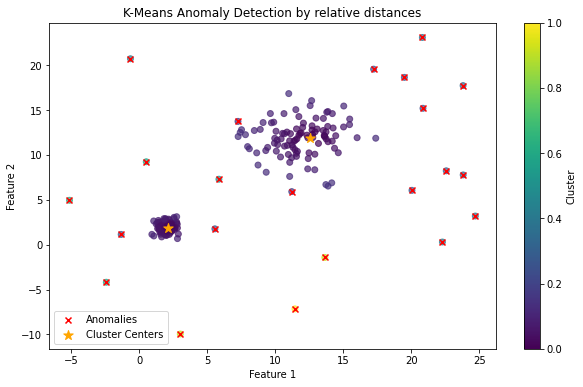

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=relative_distances, cmap='viridis', alpha=0.7)
plt.scatter(X[anomalies_relative_distances, 0], X[anomalies_relative_distances, 1], c='red', marker='x', label='Anomalies')
plt.scatter(centroids[:, 0], centroids[:, 1], c='orange', marker='*', s=100, label='Cluster Centers')
plt.colorbar(label='Cluster')
plt.title('K-Means Anomaly Detection by relative distances')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

The performance exhibits significant improvement when employing relative distances.

### 2.4.2 DBSCAN

To apply a DBSCAN clustering on the dataset, we use the [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) provided by scikit-learn.

The parameter `eps` represents the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for the data set and distance function. By default, it is set to `0.5`. We set it to `2` in the document, you can have a try on other values on your own.

The parameter `min_samples` means the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. It is set to `5` by default.

We use [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN.fit) to compute clusters. 

In [32]:
dbscan = DBSCAN(eps=2)
dbscan.fit(X)

DBSCAN(eps=2)

Retrieve cluster labels with [DBSCAN.labels_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), where the label -1 designates noise points, which are considered anomalies in this context.

In [33]:
cluster_labels_DBSCAN = dbscan.labels_

Visualize the data and anomalies with [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html). 

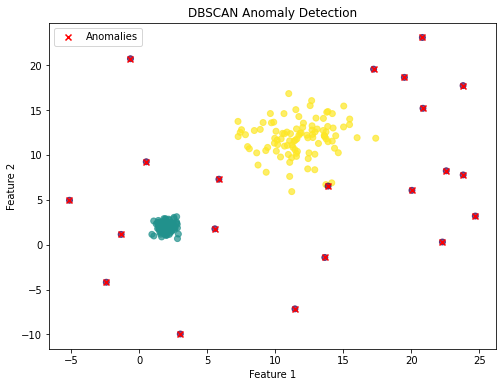

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_DBSCAN, alpha=0.7)
plt.scatter(X[cluster_labels_DBSCAN == -1, 0], X[cluster_labels_DBSCAN == -1, 1], c='red', marker='x', label='Anomalies')

plt.title('DBSCAN Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

We can observe that DBSCAN anomaly detection performs well on our dataset because the two clusters are well-separated, and the differences in densities are relatively small.

## 2.5 Isolation-based technique - Isolation Forest

To apply the Isolation Forest algorithm to our dataset, we utilize the [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) from scikit-learn and proceed to train it using the dataset X.

In [35]:
IF = IsolationForest(random_state=0)
IF.fit(X)

IsolationForest(random_state=0)

We use the class [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to visualize a discrete decision boundary. The background color represents whether a sample in that given area is predicted to be an outlier or not. The scatter plot displays the true labels.

In [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html), with the parameter `response_method` set to `predict`, a prediction is made for each sample.

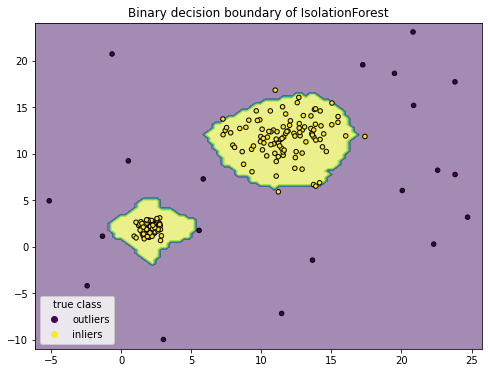

In [36]:
disp = DecisionBoundaryDisplay.from_estimator(
    IF,
    X,
    response_method="predict",
    alpha=0.5,
)

disp.figure_.set_size_inches(8, 6)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary of IsolationForest")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

In [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html), with the parameter `response_method` set to `decision_function`, it predicts a 'soft' score for each sample in relation to each class, rather than the 'hard' categorical prediction produced by `predict`.

The background of the [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) represents the measure of normality of an observation. Such score is given by the path length averaged over a forest of random trees, which itself is given by the depth of the leaf (or equivalently the number of splits) required to isolate a given sample.

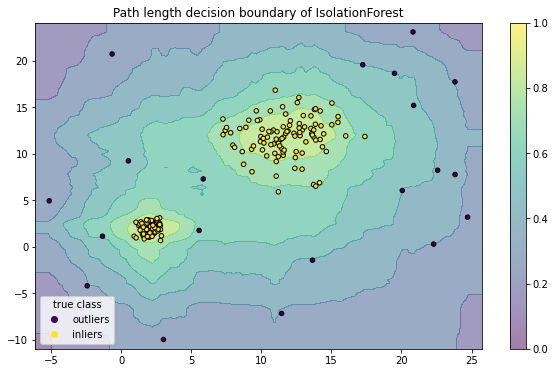

In [37]:
disp = DecisionBoundaryDisplay.from_estimator(
    IF,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.figure_.set_size_inches(10,6)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary of IsolationForest")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

Author: *Kaki Zhou* 7/9/2023 